In [31]:
library(ggplot2)
library(ggridges)
theme_set(theme_minimal())
library('transformeR')


    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.1.3 (2021-08-04) is loaded


Get the latest stable version (2.1.5) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.



In [4]:
load('../1.Upscaling/upscaling_ba/ba_grid_5.Rdata',verbose = TRUE)

Loading objects:
  ba.mergeGrid5


In [7]:
load('../3.Datos generados/dataframes/df.series_grid_5.Rdata',verbose = TRUE)

Loading objects:
  df.seriesTemporales_conCoords


In [ ]:
load('../3.Datos generados/dataframes/df_grid_5.Rdata',verbose = TRUE)
df.fireSeasson = df

Loading objects:
  df


In [23]:
df_sinCeros <- data.frame()
for (i in 1:nrow(df.seriesTemporales_conCoords)){
    if (all(unlist(df.seriesTemporales_conCoords[i,3:14]) != 0)){
        df_sinCeros <- rbind(df_sinCeros, df.seriesTemporales_conCoords[i,])
    }
}

In [26]:
df_sinCeros[1:10,]

,coord_x,coord_y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-157.5_17.5,-157.5,17.5,8.537555,167.94650,102.23748,0.9757182,70.78624,61.07549,330.5478,1047.7494,104.8866,112.5342,19.34492,63.88650
-157.5_22.5,-157.5,22.5,26.344468,62.69385,115.79825,125.6240955,71.29733,282.15175,590.1779,619.0135,560.5821,217.3675,84.84128,59.01965
-122.5_37.5,-122.5,37.5,618.755855,84.25837,69.27618,1708.4877364,2745.30994,7410.61160,17981.7212,43957.0369,32520.1744,26812.8418,20958.38060,2080.40000
-122.5_42.5,-122.5,42.5,531.036173,458.50596,730.13060,1335.3700182,1616.43042,3304.28220,30074.5662,80886.9974,67942.6008,16887.2475,5730.85188,901.86831
-122.5_47.5,-122.5,47.5,84.643805,10.00114,17.80690,160.9939682,547.53017,2987.60453,20544.7520,24790.5938,18111.7381,7964.0189,4827.75458,250.94613
-122.5_57.5,-122.5,57.5,430.049077,209.53608,36.30921,1404.7980227,4427.69585,2097.22947,6374.0469,5278.6166,2328.7774,1000.3904,565.77883,175.04898
-117.5_32.5,-117.5,32.5,784.874832,757.86811,98.79175,463.0558955,5358.17522,11687.73178,14264.1308,15533.4921,17928.2848,18744.1274,15342.80331,5922.85934
-117.5_37.5,-117.5,37.5,360.734723,88.62161,21.95371,212.9511318,1242.46736,6576.96429,17870.9162,17901.2466,18313.6895,11104.2118,2670.78609,364.68725
-117.5_42.5,-117.5,42.5,57.323609,161.31846,209.69908,700.5233545,1302.05933,3694.53478,98225.0731,97910.8756,31640.9558,12849.3690,1462.27086,50.11785


Picking joint bandwidth of 2.27



,coord_x,coord_y,FireSeassonOrNot,main_fire_season_start,main_fire_season_end,secondary_fire_season_start,secondary_fire_season_end,fireSeassonLength,SeassonalConcentration,SeassonalTiming,FBA
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
422,-122.5,37.5,1,1,9,NA,NA,9,0.7063497,0.6500246,0.4750457


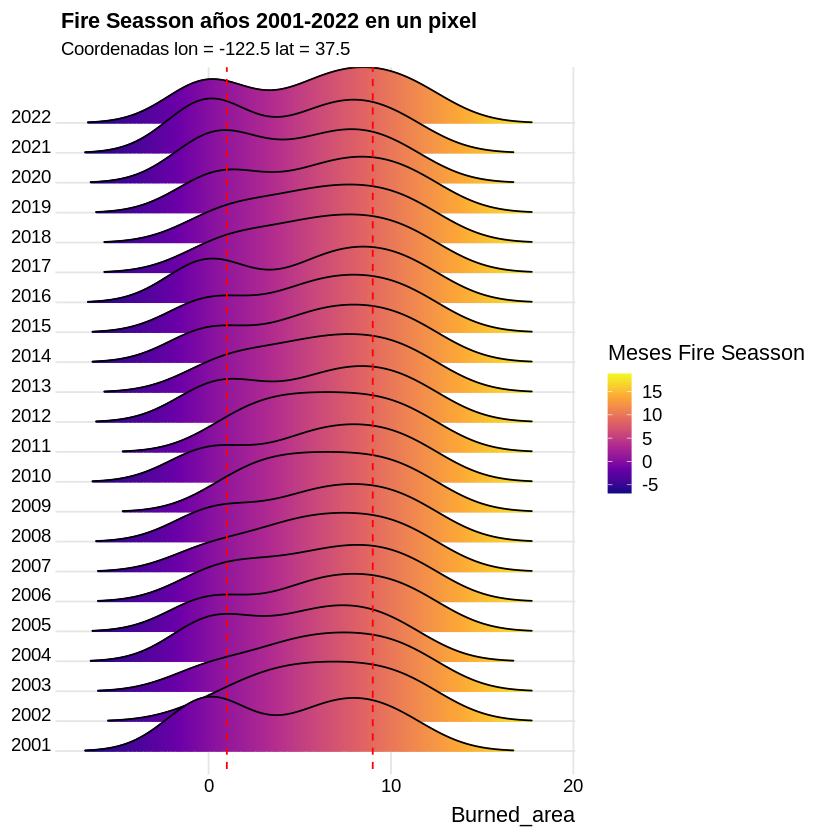

In [304]:
x = df_sinCeros$'coord_x'[3]
y = df_sinCeros$'coord_y'[3]
df2 <- data.frame()
for (year in 2001:2022){
    for (season in 1:12){
        subgrid <- subsetGrid(grid = ba.mergeGrid5, year = year, season = season, lonLim  = x, latLim  = y)
        df2 <- rbind(df2, c(year, season, subgrid$Data))
    }        
}
colnames(df2) = c('Year', 'Month','Burned_area')
df2$Year <- as.character(df2$Year)
for (row in 1:nrow(df2)){
    if (df2$Burned_area[row] != 0){
        df2$Burned_area[row] = df2$Month[row]
    }
}

startFireSeasson = df.fireSeasson[df.fireSeasson$coord_x == x & df.fireSeasson$coord_y == y, ]$main_fire_season_start
endFireSeasson = df.fireSeasson[df.fireSeasson$coord_x == x & df.fireSeasson$coord_y == y, ]$main_fire_season_end
ggplot(df2, aes(x = Burned_area, y = Year, fill = stat(x))) +
  geom_density_ridges_gradient(scale = 2, rel_min_height = 0.01, gradient_lwd = 1.)+
  scale_fill_viridis_c(name = "Meses Fire Seasson", option = "C") +
  labs(
    title = 'Fire Seasson años 2001-2022 en un pixel',
    subtitle = paste0('Coordenadas ','lon = ',x,' lat = ',y)
  ) +
  theme_ridges(font_size = 13, grid = TRUE) + 
  theme(axis.title.y = element_blank()) +
  geom_vline(xintercept = c(startFireSeasson, endFireSeasson), color = "red", linetype = "dashed")

df.fireSeasson[df.fireSeasson$coord_x == x & df.fireSeasson$coord_y == y, ]

Picking joint bandwidth of 2.3



,coord_x,coord_y,FireSeassonOrNot,main_fire_season_start,main_fire_season_end,secondary_fire_season_start,secondary_fire_season_end,fireSeassonLength,SeassonalConcentration,SeassonalTiming,FBA
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
425,-122.5,52.5,1,1,1,3,7,6,0.872338,1.104374,0.9706786


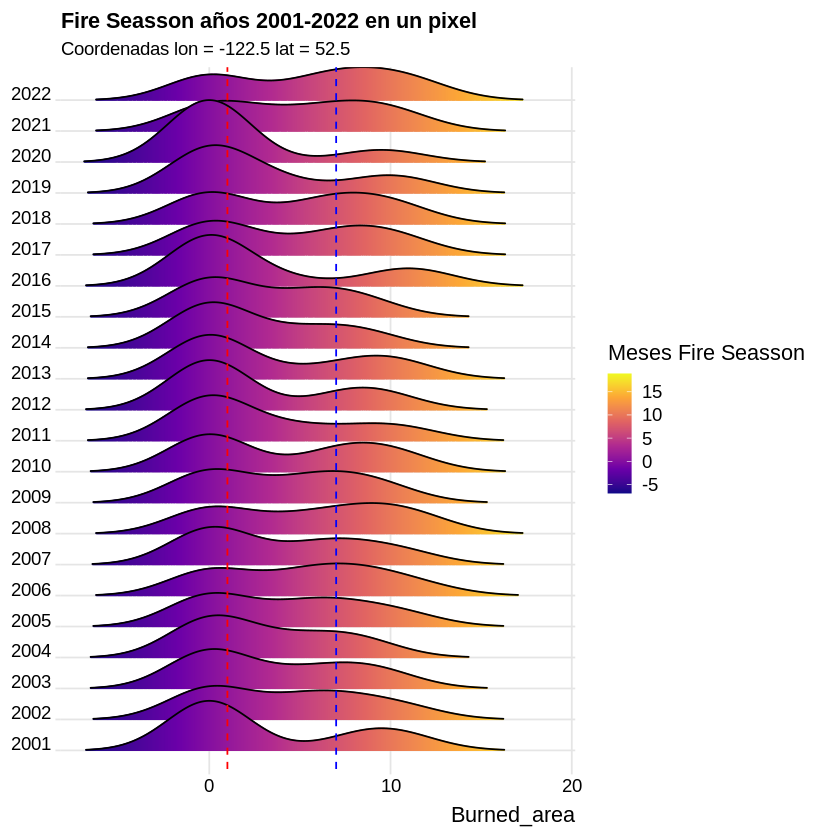

In [326]:
x = -122.5
y = 52.5
df2 <- data.frame()
for (year in 2001:2022){
    for (season in 1:12){
        subgrid <- subsetGrid(grid = ba.mergeGrid5, year = year, season = season, lonLim  = x, latLim  = y)
        df2 <- rbind(df2, c(year, season, subgrid$Data))
    }        
}
colnames(df2) = c('Year', 'Month','Burned_area')
df2$Year <- as.character(df2$Year)
for (row in 1:nrow(df2)){
    if (df2$Burned_area[row] != 0){
        df2$Burned_area[row] = df2$Month[row]
    }
}

startFireSeasson = df.fireSeasson[df.fireSeasson$coord_x == x & df.fireSeasson$coord_y == y, ]$main_fire_season_start
endFireSeasson = df.fireSeasson[df.fireSeasson$coord_x == x & df.fireSeasson$coord_y == y, ]$main_fire_season_end
ggplot(df2, aes(x = Burned_area, y = Year, fill = stat(x))) +
  geom_density_ridges_gradient(scale = 2, rel_min_height = 0.01, gradient_lwd = 1.)+
  scale_fill_viridis_c(name = "Meses Fire Seasson", option = "C") +
  labs(
    title = 'Fire Seasson años 2001-2022 en un pixel',
    subtitle = paste0('Coordenadas ','lon = ',x,' lat = ',y)
  ) +
  theme_ridges(font_size = 13, grid = TRUE) + 
  theme(axis.title.y = element_blank()) +
  geom_vline(xintercept = c(startFireSeasson, endFireSeasson), color = "red", linetype = "dashed") +
  geom_vline(xintercept = 7, color = "blue", linetype = "dashed")

df.fireSeasson[df.fireSeasson$coord_x == x & df.fireSeasson$coord_y == y, ]

Picking joint bandwidth of 5030



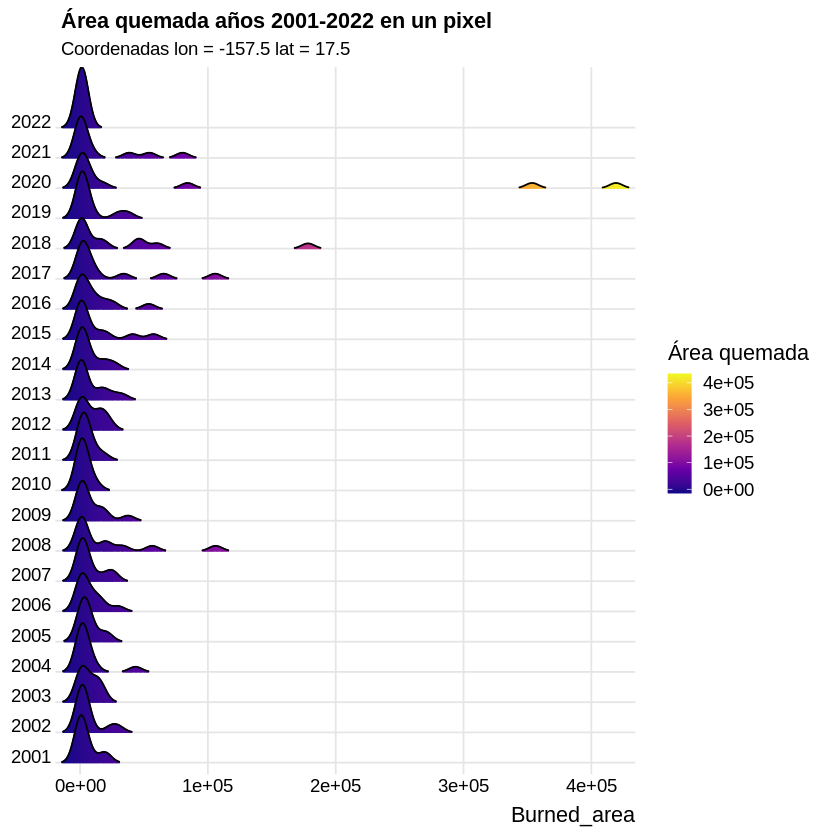

In [291]:
ggplot(df2, aes(x = Burned_area, y = Year, fill = stat(x))) +
  geom_density_ridges_gradient(scale = 2, rel_min_height = 0.01, gradient_lwd = 1.) +
  scale_x_continuous(expand = c(0, 0)) +
  scale_y_discrete(expand = expansion(mult = c(0.01, 0.01)))+
  scale_fill_viridis_c(name = "Área quemada", option = "C") +
  labs(
    title = 'Área quemada años 2001-2022 en un pixel',
    subtitle = 'Coordenadas lon = -157.5 lat = 17.5'
  ) +
  theme_ridges(font_size = 13, grid = TRUE) + 
  theme(axis.title.y = element_blank())